# Prediction of Engagement Score

## Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.
Users can like, comment and share the videos on the platform. 
Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 
Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.


## Objective

The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.


## Data Dictionary

### Training set

train.csv contains the user and video information along with the engagement score

![Train Dataset](pic1.png)


### Test set

test.csv contains only the user and video information, and you have to predict the engagement score

![Test Dataset](pic2.png)

## Evaluation metric

 * The evaluation metric for this hackathon is r2 score.


## Guidelines for Final Submission

Please ensure that your final submission includes the following:

    1. Solution file containing the predictions for the row_id in the test set (Format is given in sample_submission.csv)
    2. A zipped file containing code & approach (Note that both code and approach document are mandatory for shortlisting)
    
        a. Code: Clean code with comments on each part
        b. Approach: Please share your approach to solve the problem (doc/ppt/pdf format). It should cover the following topics:


             i.  A brief on the approach used to solve the problem.
            ii.  Which Data-preprocessing / Feature Engineering ideas really worked? How did you discover them?
           iii.  What does your final model look like? How did you reach it?

## Public and Private Split

Test data is further divided into Public (40%) and Private (60%) data.

 * Your initial responses will be checked and scored on the Public data.
 * The final rankings would be based on your private score which will be published once the competition is over.

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __Step 6: Evaluation__


### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
from prettytable import PrettyTable

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
#Load the CSV files for train and test datasets

df_train = pd.read_csv("train_0OECtn8.csv")
df_test = pd.read_csv("test_1zqHu22.csv")

In [3]:
#Chech the shape of the datasets

df_train.shape,df_test.shape

((89197, 10), (11121, 9))

* __We have 89197 rows and 10 columns in Train set whereas Test set has 11121 rows and 9 columns.__

In [4]:
#Counting the datatypes of columns for train dataset

Counter(df_train.dtypes)

Counter({dtype('int64'): 7, dtype('O'): 2, dtype('float64'): 1})

In [5]:
#Counting the datatypes of columns for train dataset

Counter(df_test.dtypes)

Counter({dtype('int64'): 7, dtype('O'): 2})

* We have 7 int and 2 catagorical columns in both the datasets whereas Train dataset has 1 extra float column.

### Step 3: Data Cleaning

In [6]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [7]:
"""  Understand the dataset , all the data types of the columns, 
any null values are present in the particular columns or not and
memory usuage of the dataset"""

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [8]:
## This function will reduce the occupied memory usuage

def memory_reduce(df):
    
    #Taking all the column for the dataframe one by one
    for col in df:
        
        #Compairing the datatype of the column
        if df[col].dtype == "float64":
            
            #using downcasting loop to the reduce the size of the datatype of the columns to reduce the occupied memory usuage
            df[col]=pd.to_numeric(df[col], downcast="float")
        
        if df[col].dtype == "int64":
            
            df[col]=pd.to_numeric(df[col], downcast="integer")
            
    
    return df

In [9]:
df_train=memory_reduce(df_train)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int32  
 1   user_id           89197 non-null  int16  
 2   category_id       89197 non-null  int8   
 3   video_id          89197 non-null  int16  
 4   age               89197 non-null  int8   
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int16  
 8   views             89197 non-null  int16  
 9   engagement_score  89197 non-null  float32
dtypes: float32(1), int16(4), int32(1), int8(2), object(2)
memory usage: 2.9+ MB


In [10]:
df_test=memory_reduce(df_test)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int32 
 1   user_id      11121 non-null  int16 
 2   category_id  11121 non-null  int8  
 3   video_id     11121 non-null  int16 
 4   age          11121 non-null  int8  
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int16 
 8   views        11121 non-null  int16 
dtypes: int16(4), int32(1), int8(2), object(2)
memory usage: 325.9+ KB


#### Observation

* Memory usage of both the dataset have been reduced significantly.

In [11]:
""" checking null values present in this train dataset or not """

df_train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [12]:
""" checking null values present in this test dataset or not """

df_test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

* __There are no null values present in both the datasets.__

### Step 4: Exploratory Data Analysis

In [13]:
df_train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [14]:
df_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


### Analysis the different features

#### Profession features

In [15]:
df_train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

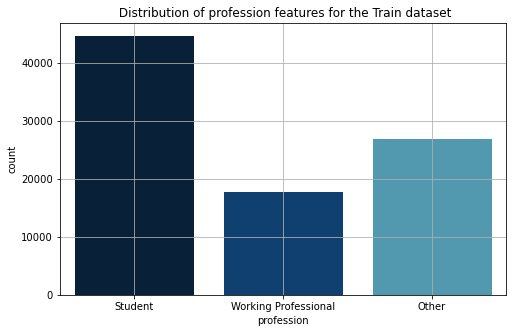

In [16]:
plt.figure(figsize=(8,5))
sns.countplot('profession',data=df_train,palette='ocean')
plt.title(" Distribution of profession features for the Train dataset")
plt.grid()
plt.show()

#### Observation

* We have 3 different types of professions in the train dataset (Student, Other, Working Professional)


* Students are highly active with the videos followed by others.


* Working professionals are less active

#### Gender features

In [17]:
df_train['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

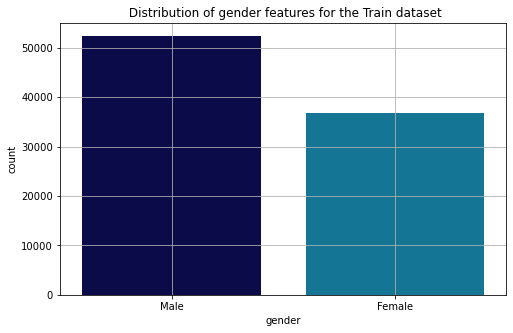

In [18]:
plt.figure(figsize=(8,5))
sns.countplot('gender', data=df_train, palette='ocean')
plt.title(" Distribution of gender features for the Train dataset")
plt.grid()
plt.show()

#### Observation

* Males are more active than females.

#### Age features

In [19]:
df_train['age'].value_counts()

18    4870
19    4528
20    4399
17    4356
16    4014
15    3875
21    3722
22    3576
14    3086
23    2971
24    2915
31    2796
30    2781
33    2756
28    2687
32    2687
29    2602
13    2588
34    2541
26    2507
25    2463
35    2422
27    2301
36    2003
37    1816
12    1776
38    1480
39    1238
11    1171
40    1066
41     834
10     752
42     675
43     592
44     449
46     343
45     340
47     264
48     197
50     172
49     131
51      97
53      81
52      66
54      51
55      48
57      40
56      24
63       8
58       8
68       6
66       5
64       5
59       4
62       3
60       3
61       3
67       3
Name: age, dtype: int64

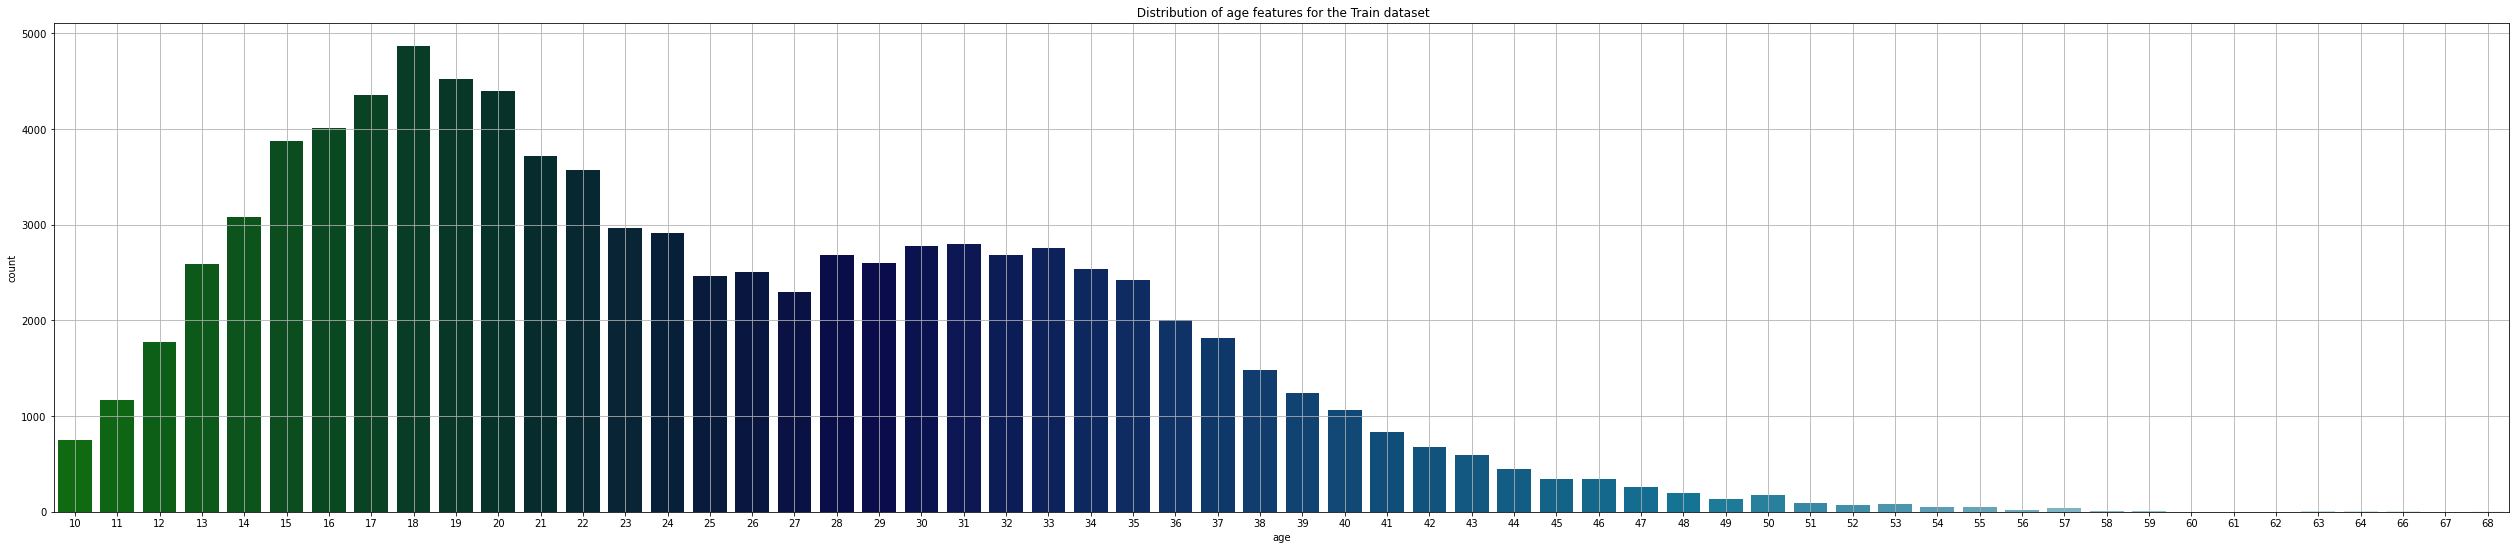

In [20]:
plt.figure(figsize=(44,9))

sns.countplot('age', data=df_train, palette='ocean')

plt.title(" Distribution of age features for the Train dataset")
plt.grid()
plt.show()

#### Observation

* Primarily between 14 to 24 age group peoples are highly active with the videos.


* Between 28 to 34 age group peoples are also active more with the videos, but not like the 14 to 24 age group.

#### Views features

In [21]:
df_train['views'].value_counts()

628     9090
229     8104
317     4880
369     4679
909     4043
138     3889
180     3766
781     3678
840     3533
462     3264
714     2712
613     2671
444     2241
689     2178
662     2164
819     1886
467     1885
156     1855
621     1845
990     1810
617     1543
362     1399
89      1339
414     1309
44      1217
884     1208
568     1156
309     1103
862     1065
178     1025
134      986
1000     962
52       916
892      702
72       545
396      536
806      534
900      458
709      366
95       227
636      214
30       167
248       47
Name: views, dtype: int64

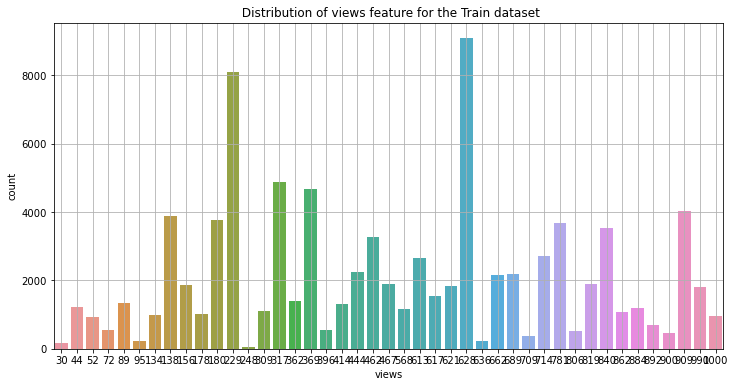

In [22]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'views' , data = df_train )
plt.title(" Distribution of views feature for the Train dataset")
plt.grid()
plt.show()


#### Observation

* From this plot it is quite difficult to analyze,  so we will try pdf and cdf in this features

In [23]:
views = df_train['views'].value_counts()

len(views)

43

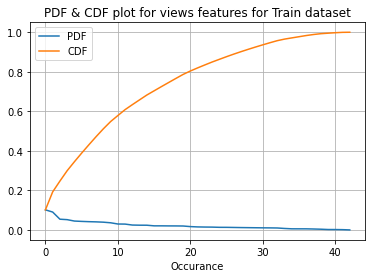

In [24]:
pdf = views.values/sum(views.values)
cdf = np.cumsum(pdf)

plt.plot(pdf)
plt.plot(cdf)
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF plot for views features for Train dataset')
plt.xlabel("Occurance")
plt.grid()
plt.show()


#### Observation

* Around 34 views have occerence around 94%

#### Followers features

In [25]:
df_train['followers'].value_counts()

230    16477
240    14767
280     7559
180     7092
270     6965
250     5533
320     5146
340     4941
210     4038
260     3340
220     2838
330     2712
290     2178
160     1885
360     1810
200     1680
190      236
Name: followers, dtype: int64

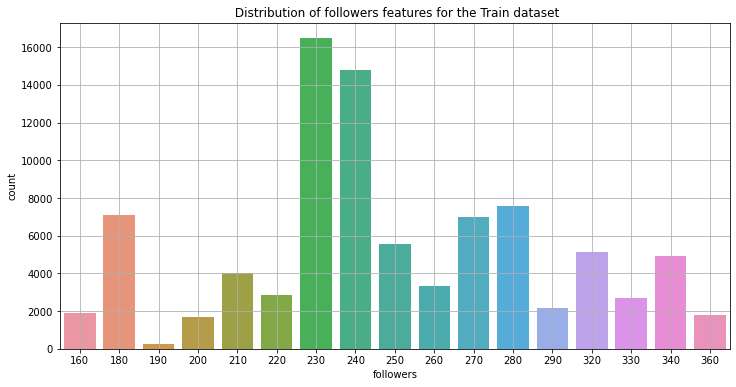

In [26]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'followers' , data = df_train )
plt.title(" Distribution of followers features for the Train dataset")
plt.grid()
plt.show()


#### Observation

* 230 and 240 followers are more important is this dataset.

In [27]:
followers = df_train['followers'].value_counts()

len(followers)

17

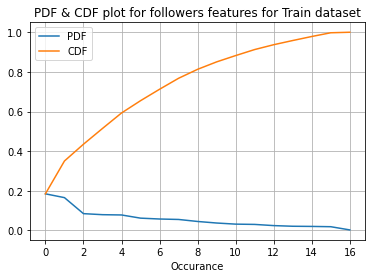

In [28]:
pdf = followers.values/sum(followers.values)
cdf = np.cumsum(pdf)

plt.plot(pdf)
plt.plot(cdf)
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF plot for followers features for Train dataset')
plt.xlabel("Occurance")
plt.grid()
plt.show()


#### Observation

* Around 14 followers have highest number of occurance

#### category_id features

In [29]:
df_train['category_id'].value_counts()

5     8104
8     6313
25    4880
19    4679
21    4043
12    3889
11    3766
4     3678
34    3297
16    3264
13    2777
32    2712
23    2671
18    2241
42    2178
15    2164
9     1886
7     1885
31    1855
3     1845
1     1810
6     1399
39    1339
28    1309
10    1217
17    1208
26    1156
27    1103
36    1025
43    1019
35     986
37     962
29     916
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     236
45     227
44     214
2      167
47      47
Name: category_id, dtype: int64

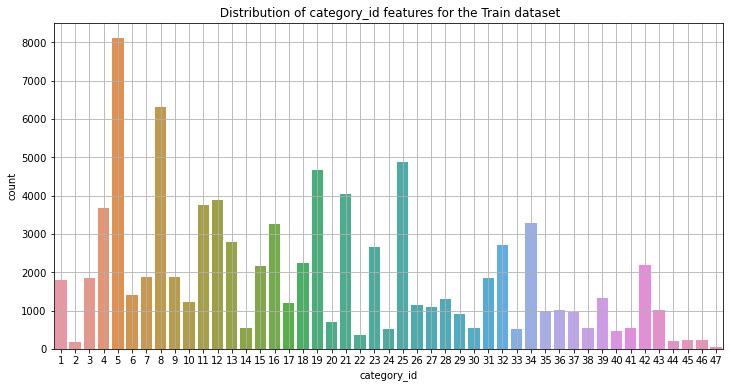

In [30]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'category_id' , data = df_train )
plt.title(" Distribution of category_id features for the Train dataset")
plt.grid()
plt.show()


#### Observation

* Catagory 5 has very high occurence than others followed by 8

* Few more catagories have high occurence

### Step 5: Building Model

In [31]:
df_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [33]:
"""
We have used to transform non-numerical labels  to numerical labels.
In this project we have only two columns as object type (Gender and Profession)

"""
#Refernece https://www.analyticsvidhya.com/Trying Different Models.zip

# Labelencoding
le = LabelEncoder()

var_mod = df_train.select_dtypes(include='object').columns

for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

* __Encoding the required columns from training and test dataset__

In [35]:
df_train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [36]:
# Seperate Features and Target

y = df_train['engagement_score']
X = df_train.drop(['row_id', 'engagement_score'], axis=1)

In [37]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((71357, 8), (17840, 8), (71357,), (17840,))

## ML models

### Model 1 LightGBM 

In [40]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.


for i in range(40):
    lr = np.round(np.random.rand()/10,3)
    num_leaves = np.random.randint(30,150)
    min_data_in_leaf = np.random.randint(50,150)

    lgb = LGBMRegressor( learning_rate=lr ,
                            num_leaves=num_leaves ,
                            min_data_in_leaf=min_data_in_leaf)

    lgb.fit(X_train,y_train)

    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = lgb.predict(X_valid)

    # Now that it has predicted the values for X_val, we are calculating it's r2 score
    R2= r2_score(y_valid,y_pred)
    
    print(f"For learning rate {lr}, num_leaves {num_leaves} and min_data_in_leaf {min_data_in_leaf} the R2 score is {R2} ")
    print('*'*80)

[LightGBM] [Warning] min_data_in_leaf is set=126, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=126
For learning rate 0.039, num_leaves 76 and min_data_in_leaf 126 the R2 score is 0.3629303229890699 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
For learning rate 0.01, num_leaves 99 and min_data_in_leaf 111 the R2 score is 0.2998341020353186 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=145, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=145
For learning rate 0.042, num_leaves 35 and min_data_in_leaf 145 the R2 score is 0.35860828929860133 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored

For learning rate 0.002, num_leaves 130 and min_data_in_leaf 119 the R2 score is 0.11291783476263684 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=112, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=112
For learning rate 0.099, num_leaves 30 and min_data_in_leaf 112 the R2 score is 0.3682731849216885 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
For learning rate 0.079, num_leaves 128 and min_data_in_leaf 103 the R2 score is 0.3726775934039107 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
For learning rate 0.055, num_leaves 89 and min_data_in_leaf 93 the R2 score is 0.368

In [41]:
# After running several combinations, we found these parameter values to give best result

learning_rate = 0.089
num_leaves = 124
min_data_in_leaf = 115


# Now that we have found the best model which has the lowest RMSE score, we are using that parameter values to retrain the model.

lgb = LGBMRegressor( learning_rate=learning_rate ,
                           num_leaves=num_leaves ,
                           min_data_in_leaf=min_data_in_leaf)

lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_valid)


# Now that it has predicted the values for X_val, we are calculating it's rmse
R2= r2_score(y_valid,y_pred)
print(f"For learning rate {learning_rate}, num_leaves {num_leaves} and min_data_in_leaf {min_data_in_leaf} the R2 score is {R2} ")

[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115
For learning rate 0.089, num_leaves 124 and min_data_in_leaf 115 the R2 score is 0.3738038947492418 


### Model 2 CATBOOST

In [42]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.
for i in range(40):
    lr = np.round(np.random.rand()/10,3)
    min_data_in_leaf = np.random.randint(50,150)

    cbr = CatBoostRegressor(learning_rate=lr ,
                        min_data_in_leaf=min_data_in_leaf,
                        logging_level="Silent", iterations=130)

    cbr.fit(X_train,y_train)

    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = cbr.predict(X_valid)

    # Now that it has predicted the values for X_val, we are calculating it's r2 score
    R2= r2_score(y_valid,y_pred)
    
    print(f"For learning rate {lr} and min_data_in_leaf {min_data_in_leaf} the R2 score is {R2} ")
    print('*'*80)

For learning rate 0.092 and min_data_in_leaf 124 the R2 score is 0.3621756339845301 
********************************************************************************
For learning rate 0.04 and min_data_in_leaf 141 the R2 score is 0.3469809726962123 
********************************************************************************
For learning rate 0.042 and min_data_in_leaf 67 the R2 score is 0.34899845281009423 
********************************************************************************
For learning rate 0.025 and min_data_in_leaf 75 the R2 score is 0.33375769557221224 
********************************************************************************
For learning rate 0.065 and min_data_in_leaf 80 the R2 score is 0.3572127118632673 
********************************************************************************
For learning rate 0.025 and min_data_in_leaf 106 the R2 score is 0.33375769557221224 
********************************************************************************
For l

In [43]:
# After running several combinations, we found these parameter values to give best result

learning_rate = 0.093
min_data_in_leaf = 130

# Now that we have found the best model which has the lowest RMSE score, we are using that parameter values to retrain the model.

cbr = CatBoostRegressor(learning_rate=learning_rate, min_data_in_leaf = min_data_in_leaf, iterations=1000, logging_level="Silent")

cbr.fit(X_train, y_train)

# After training the model, we are trying to predict the model on X_val to check it's accuracy
y_pred = cbr.predict(X_valid)

# Now that it has predicted the values for X_val, we are calculating it's r2 score
R2= r2_score(y_valid,y_pred)
    
print(f"For learning rate {lr} and min_data_in_leaf {min_data_in_leaf} the R2 score is {R2} ")

For learning rate 0.093 and min_data_in_leaf 130 the R2 score is 0.3756094352120337 


### Model 3 XGBoost

In [45]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.


for i in range(40):
    lr = np.round(np.random.rand()/10,3)
    min_child_weight  = np.random.randint(30,150)
    max_leaves = np.random.randint(30,100)

    xgb = XGBRegressor(tree_method = 'hist', learning_rate = lr,min_child_weight = min_child_weight, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,grow_policy = 'lossguide',
                       max_leaves = max_leaves, n_jobs=-1 ) 
    
    xgb.fit(X_train,y_train)
    y_pred = xgb.predict(X_valid)

    # Now that it has predicted the values for X_val, we are calculating it's r2 score
    R2= r2_score(y_valid,y_pred)
    
    print(f"For learning rate {lr}, min_child_weight {min_child_weight} and max_leaves {max_leaves} the R2 score is {R2} ")
    print('*'*80)

For learning rate 0.064, min_child_weight 45 and max_leaves 67 the R2 score is 0.3656220724842507 
********************************************************************************
For learning rate 0.037, min_child_weight 93 and max_leaves 81 the R2 score is 0.3496974962207512 
********************************************************************************
For learning rate 0.052, min_child_weight 53 and max_leaves 80 the R2 score is 0.36241603018836754 
********************************************************************************
For learning rate 0.079, min_child_weight 104 and max_leaves 80 the R2 score is 0.3661692773926152 
********************************************************************************
For learning rate 0.059, min_child_weight 62 and max_leaves 79 the R2 score is 0.36368528700387803 
********************************************************************************
For learning rate 0.094, min_child_weight 123 and max_leaves 91 the R2 score is 0.367517347854960

In [46]:
lr = 0.097
min_child_weight  = 40
max_leaves = 76

# Now that we have found the best model which has the lowest RMSE score, we are using that parameter values to retrain the model.

xgb = XGBRegressor(tree_method = 'hist', learning_rate = lr,min_child_weight = min_child_weight, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 1000,grow_policy = 'lossguide',
                       max_leaves = max_leaves, n_jobs=-1 )
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_valid)

# Now that it has predicted the values for X_val, we are calculating it's r2 score
R2= r2_score(y_valid,y_pred)
    
print(f"For learning rate {lr}, min_child_weight {min_child_weight} and max_leaves {max_leaves} the R2 score is {R2} ")
    

For learning rate 0.097, min_child_weight 40 and max_leaves 76 the R2 score is 0.3737048388557631 


### Model 4 Linear Regression

In [47]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_valid)

# Now that it has predicted the values for X_val, we are calculating it's r2 score
R2= r2_score(y_valid,y_pred)

print(f"The R2 score is {R2}")

The R2 score is 0.2434242422182552


### Model 5 ElasticNet

In [49]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.


alp = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
l1_ratio = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]

for i in alp:
    for j in l1_ratio:
        
        model = ElasticNet(alpha=i,l1_ratio=j, max_iter=250)
        model.fit(X_train,y_train)
        
        y_pred = model.predict(X_valid)

        R2= r2_score(y_valid,y_pred)
        
        print(f"For alpha {i} and l1_ratio {j} the R2 score is {R2} ")
        print('*'*80)

For alpha 1e-06 and l1_ratio 1e-06 the R2 score is 0.24342421928004332 
********************************************************************************
For alpha 1e-06 and l1_ratio 1e-05 the R2 score is 0.24342421927997104 
********************************************************************************
For alpha 1e-06 and l1_ratio 0.0001 the R2 score is 0.24342421927925117 
********************************************************************************
For alpha 1e-06 and l1_ratio 0.001 the R2 score is 0.24342421927204516 
********************************************************************************
For alpha 1e-06 and l1_ratio 0.01 the R2 score is 0.24342421920000712 
********************************************************************************
For alpha 1e-06 and l1_ratio 0.1 the R2 score is 0.24342421847972062 
********************************************************************************
For alpha 1e-06 and l1_ratio 1 the R2 score is 0.243424211275315 
******************

For alpha 1000 and l1_ratio 0.0001 the R2 score is 0.020437667055260955 
********************************************************************************
For alpha 1000 and l1_ratio 0.001 the R2 score is 0.013508148825048805 
********************************************************************************
For alpha 1000 and l1_ratio 0.01 the R2 score is 0.005996962934207595 
********************************************************************************
For alpha 1000 and l1_ratio 0.1 the R2 score is -4.1227606905946956e-05 
********************************************************************************
For alpha 1000 and l1_ratio 1 the R2 score is -4.1227606905946956e-05 
********************************************************************************


In [50]:
alpha = 1e-06
l1_ratio = 1e-06

model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio, max_iter=250)
model.fit(X_train,y_train)

y_pred = model.predict(X_valid)
R2= r2_score(y_valid,y_pred)        
print(f"For alpha {i} and l1_ratio {j} the R2 score is {R2} ")

For alpha 1000 and l1_ratio 1 the R2 score is 0.24342421928004332 


### Model 6 Ridge Regression

In [51]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.


alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.05,0.5,1,10,100]

for i in alpha:
    
    model = Ridge(alpha=i)

    model.fit(X_train, y_train)

    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = model.predict(X_valid)
    

    # Now that it has predicted the values for X_val, we are calculating it's rmse
    R2= r2_score(y_valid,y_pred)
    
    print(f"For alpha value {i} the R2 is {R2} ")
    print('*'*80)

For alpha value 1e-06 the R2 is 0.2434242422179338 
********************************************************************************
For alpha value 1e-05 the R2 is 0.2434242422150411 
********************************************************************************
For alpha value 0.0001 the R2 is 0.24342424218611314 
********************************************************************************
For alpha value 0.001 the R2 is 0.24342424189683454 
********************************************************************************
For alpha value 0.01 the R2 is 0.24342423900400212 
********************************************************************************
For alpha value 0.1 the R2 is 0.24342421007108206 
********************************************************************************
For alpha value 0.05 the R2 is 0.2434242261459585 
********************************************************************************
For alpha value 0.5 the R2 is 0.24342408137920812 
*****************

In [52]:
# We are re-training our model with the best alpha value.
model = Ridge(alpha=1e-06)

model.fit(X_train, y_train)

# After training the model, we are trying to predict the model on X_val to check it's accuracy
y_pred = model.predict(X_valid)
    
# Now that it has predicted the values for X_val, we are calculating it's rmse
R2= r2_score(y_valid,y_pred)
print(f"For alpha value 1, the R2 score is {R2}")

For alpha value 1, the R2 score is 0.2434242422179338


### Model 7 Lasso Regression

In [53]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.


alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.05,0.5,1,10,100]

for i in alpha:
    
    model = Lasso(alpha=i)

    model.fit(X_train, y_train)

    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = model.predict(X_valid)
    

    # Now that it has predicted the values for X_val, we are calculating it's rmse
    R2= r2_score(y_valid,y_pred)
    
    print(f"For alpha value {i} the R2 is {R2} ")
    print('*'*80)

For alpha value 1e-06 the R2 is 0.243424211275315 
********************************************************************************
For alpha value 1e-05 the R2 is 0.2434239320552296 
********************************************************************************
For alpha value 0.0001 the R2 is 0.24342106638768057 
********************************************************************************
For alpha value 0.001 the R2 is 0.2433850520788967 
********************************************************************************
For alpha value 0.01 the R2 is 0.24228963791670188 
********************************************************************************
For alpha value 0.1 the R2 is 0.18031334125142062 
********************************************************************************
For alpha value 0.05 the R2 is 0.22307693703421938 
********************************************************************************
For alpha value 0.5 the R2 is 0.0665318106591889 
*******************

In [54]:
# We are re-training our model with the best alpha value.

model = Lasso(alpha=1e-06)
model.fit(X_train, y_train)

# After training the model, we are trying to predict the model on X_val to check it's accuracy
y_pred = model.predict(X_valid)
    
# Now that it has predicted the values for X_val, we are calculating it's rmse
R2= r2_score(y_valid,y_pred)

print(f"For alpha value 0.001, the R2 score is {R2}")

For alpha value 0.001, the R2 score is 0.243424211275315


### Model 8 AdaBoost Regression

In [55]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.


lr_lst = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.05,0.025,0.05,0.075,1,10,100] 

for lr in lr_lst:
    
    model = AdaBoostRegressor(n_estimators=50,learning_rate=lr,loss='square')
    model.fit(X_train,y_train)
    
    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = model.predict(X_valid)
    

    # Now that it has predicted the values for X_val, we are calculating it's rmse
    R2= r2_score(y_valid,y_pred)
    
    print(f"For learning_rate {lr} the R2 is {R2} ")
    print('*'*80)

For learning_rate 1e-06 the R2 is 0.26559448220482074 
********************************************************************************
For learning_rate 1e-05 the R2 is 0.2652395803023011 
********************************************************************************
For learning_rate 0.0001 the R2 is 0.26666871627142363 
********************************************************************************
For learning_rate 0.001 the R2 is 0.2653823325204506 
********************************************************************************
For learning_rate 0.01 the R2 is 0.26892060758235503 
********************************************************************************
For learning_rate 0.1 the R2 is 0.1810393149717906 
********************************************************************************
For learning_rate 0.05 the R2 is 0.26051527118476825 
********************************************************************************
For learning_rate 0.025 the R2 is 0.27349846313391735 

In [56]:

model = AdaBoostRegressor(n_estimators=50,learning_rate=0.01,loss='square')
model.fit(X_train,y_train)
    
# After training the model, we are trying to predict the model on X_val to check it's accuracy
y_pred = model.predict(X_valid)
    

# Now that it has predicted the values for X_val, we are calculating it's rmse
R2= r2_score(y_valid,y_pred)
    
print(f"For learning_rate {lr} the R2 is {R2} ")

For learning_rate 100 the R2 is 0.2680198052097289 


### Model 9 KNeighbors Regressor

In [58]:
# We are training our model with multiple parameter values to get the best parameter to be used for the model.

# We are randomly creating values to chose the best model out of it.

n_neighbors = [3,5,7,9,11,13,15,17,19,25,29,43,47,51,55,59,65,67,71,75,79,81,85,87,91,95,97,99] 

for i in n_neighbors:
    
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    
    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = model.predict(X_valid)
    

    # Now that it has predicted the values for X_val, we are calculating it's rmse
    R2= r2_score(y_valid,y_pred)
    
    print(f"For n_neighbors {i} the R2 is {R2} ")
    print('*'*80)



For n_neighbors 3 the R2 is -0.07316338242576403 
********************************************************************************
For n_neighbors 5 the R2 is -0.020751852795035886 
********************************************************************************
For n_neighbors 7 the R2 is 0.002355508130082118 
********************************************************************************
For n_neighbors 9 the R2 is 0.014945948304145973 
********************************************************************************
For n_neighbors 11 the R2 is 0.023651228835799953 
********************************************************************************
For n_neighbors 13 the R2 is 0.023298626822171542 
********************************************************************************
For n_neighbors 15 the R2 is 0.027151540101252758 
********************************************************************************
For n_neighbors 17 the R2 is 0.028633432221528143 
****************************

In [59]:
model = KNeighborsRegressor(n_neighbors=55)
model.fit(X_train,y_train)
    
# After training the model, we are trying to predict the model on X_val to check it's accuracy
y_pred = model.predict(X_valid)
    

# Now that it has predicted the values for X_val, we are calculating it's rmse
R2= r2_score(y_valid,y_pred)
    
print(f"For n_neighbors {i} the R2 is {R2} ")

For n_neighbors 99 the R2 is 0.027542493970058146 


### Step 6: Evaluation

In [60]:
table = PrettyTable(["Model", "R2_score"])
  
table.add_row(["CatBoost Regressor","0.37560"])
table.add_row(["LGBM Regressor","0.37380"])
table.add_row(["XG Boost Regressor","0.37370"])
table.add_row(["AdaBoost Regressor","0.26801"])
table.add_row(["Linear Regression","0.24342"])
table.add_row(["ElasticNet Regressor","0.24342"])
table.add_row(["Ridge Regressor","0.24342"])
table.add_row(["Lasso Regressor","0.24342"])
table.add_row(["KNeighbors Regressor ","0.02754"])

print(table)  

+-----------------------+----------+
|         Model         | R2_score |
+-----------------------+----------+
|   CatBoost Regressor  | 0.37560  |
|     LGBM Regressor    | 0.37380  |
|   XG Boost Regressor  | 0.37370  |
|   AdaBoost Regressor  | 0.26801  |
|   Linear Regression   | 0.24342  |
|  ElasticNet Regressor | 0.24342  |
|    Ridge Regressor    | 0.24342  |
|    Lasso Regressor    | 0.24342  |
| KNeighbors Regressor  | 0.02754  |
+-----------------------+----------+


* As we can clearly see CatBoost Regressor performs slighlty better than LGBM and XGBoost regression. 


* so we can select CatBoost Regressor for making our final predictions

# Final Model

In [61]:
learning_rate = 0.093
min_data_in_leaf = 130

# Now that we have found the best model which has the lowest RMSE score, we are using that parameter values to retrain the model.

cbr = CatBoostRegressor(learning_rate=learning_rate, min_data_in_leaf = min_data_in_leaf, iterations=1000, logging_level="Silent")

cbr.fit(X_train, y_train)


### Final Prediction

In [62]:
submission = pd.read_csv('sample_submission_JPlpRcN.csv')

In [63]:
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,1,1,180,138
1,89199,11278,34,115,14,1,1,230,840
2,89200,17245,8,110,44,0,2,280,628
3,89201,9851,16,137,18,1,1,270,462
4,89202,16008,34,96,47,0,0,230,840


In [64]:
df_test = df_test.drop(['row_id'], axis=1)

In [65]:
final_predictions = cbr.predict(df_test)
submission['engagement_score'] = final_predictions

#only positive predictions for the target variable
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

# Conclusion

* Although the R-square is quite low because of lack of information provided by the dataset, Still based on the highest result of R-square score I found CatBoost algorithm worked well on the validation data. 

* Still managed to get engagement score quite well as a result stored in my_submission.csv
